In [1]:
import pandas as pd

# 1. LDA主题建模

分出基本特征

In [2]:
news_df = pd.read_csv("./Data/pre.csv", encoding="utf-8")

news_df = news_df.rename(columns=lambda x: x.strip())

news_df = news_df.loc[:,["url","title","content","timedelta","n_tokens_title","n_tokens_content","n_unique_tokens","n_non_stop_words",
                         "n_non_stop_unique_tokens","num_hrefs","num_self_hrefs","num_imgs","num_videos","average_token_length",
                         "num_keywords","data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                         "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world","weekday_is_monday",
                         "weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday","weekday_is_friday",
                         "weekday_is_saturday","weekday_is_sunday","is_weekend","shares"]]

news_df.head()
news_df.isnull().sum()

url                               0
title                             0
content                          33
timedelta                         0
n_tokens_title                    0
n_tokens_content                  0
n_unique_tokens                   0
n_non_stop_words                  0
n_non_stop_unique_tokens          0
num_hrefs                         0
num_self_hrefs                    0
num_imgs                          0
num_videos                        0
average_token_length              0
num_keywords                      0
data_channel_is_lifestyle         0
data_channel_is_entertainment     0
data_channel_is_bus               0
data_channel_is_socmed            0
data_channel_is_tech              0
data_channel_is_world             0
weekday_is_monday                 0
weekday_is_tuesday                0
weekday_is_wednesday              0
weekday_is_thursday               0
weekday_is_friday                 0
weekday_is_saturday               0
weekday_is_sunday           

In [3]:
news_df = news_df.dropna(subset=["content"])
news_df.isnull().sum()

url                              0
title                            0
content                          0
timedelta                        0
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
weekday_is_monday                0
weekday_is_tuesday               0
weekday_is_wednesday             0
weekday_is_thursday              0
weekday_is_friday                0
weekday_is_saturday              0
weekday_is_sunday                0
is_weekend          

## 1. lda主题分析

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [5]:
# 停用词表
with open("./LDA/stop_words.txt", "r", encoding="utf-8") as f:
    string = f.read()
stop_words = string.split("\n")

In [6]:
from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
import string

# stop_words = set(stopwords.words('english'))
stop_words = set(stop_words)

# 分词+去停用词函数
def text_segmentation(text):
    # Remove punctuation marks
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Remove stopwords
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.lower() not in stop_words]
    
    return " ".join(tokens)

news_df["content Seg"] = news_df["content"].apply(text_segmentation)

In [7]:
# 向量化
n_feature = 1000
vectorizer = CountVectorizer(strip_accents="unicode",
                             max_features=n_feature,
                             stop_words='english',
                             max_df=0.5,
                             min_df=10)

X = vectorizer.fit_transform(news_df['content Seg'])

困惑度

error：https://github.com/bmabey/pyLDAvis/issues/245

In [40]:
plexs = []
scores = []
for i in range(2,21):
    lda_ex = LatentDirichletAllocation(n_components=i, 
                                max_iter=50, 
                                learning_method='online',
                                doc_topic_prior=0.1,
                                topic_word_prior=0.01,
                                random_state=0)
    
    lda_ex.fit(X)
    plexs.append(lda_ex.perplexity(X))
    scores.append(lda_ex.score(X))

In [41]:
plexs

[1310.396735401272,
 1257.9884145962296,
 1209.915457757317,
 1190.2144821721427,
 1159.076030990669,
 1121.1642591180794,
 1113.870249057686,
 1104.8709534364934,
 1098.4066900329226,
 1090.8315879573784,
 1092.865747349189,
 1089.6377388159467,
 1083.9870100084943,
 1081.9863024954918,
 1079.3575182493153,
 1064.6167627848595,
 1063.443501983776,
 1070.2276467433414,
 1059.733976707356]

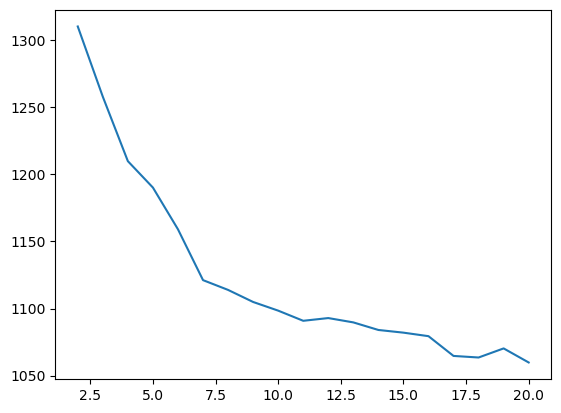

In [42]:
import matplotlib.pyplot as plt

x = list(range(2,21)) # n=18
plt.plot(x, plexs)
plt.show()

In [43]:
# 可视化
import pyLDAvis.sklearn as sklearnvis
import pyLDAvis

def LDAplot(n_topics, X, vectorizer):
    # 训练LDA模型
    lda = LatentDirichletAllocation(n_components=n_topics, 
                                    max_iter=50, 
                                    learning_method='online',
                                    doc_topic_prior=0.1,
                                    topic_word_prior=0.01,
                                    random_state=0)
    lda.fit(X)
    pyLDAvis.enable_notebook()
    vis_data = sklearnvis.prepare(lda, X, vectorizer)
    # 保存文件
    with open(f'result{n_topics}.html', 'w') as f:
        pyLDAvis.save_html(vis_data, f) 
    
LDAplot(11, X, vectorizer)

d:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
# 并入
lda = LatentDirichletAllocation(n_components=11, 
                                max_iter=50, 
                                learning_method='online',
                                doc_topic_prior=0.1,
                                topic_word_prior=0.01,
                                random_state=0)

lda_Z = lda.fit_transform(X)

In [9]:
# 输出主题下的关键词，根据主题词判定分类
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print("Topic %d:" % (topic_idx + 1))
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

Topic 1:
city york day march pm event june november april north
Topic 2:
company companies ad billion customers amazon service microsoft mobile data
Topic 3:
government police people security president told obama public report law
Topic 4:
image car courtesy images tumblr nggallery cup photo bonus cars
Topic 5:
space water air study researchers military earth russian university science
Topic 6:
people company job time business marketing digital team social technology
Topic 7:
apple iphone ipad apples ios storm battery doctor caption mini
Topic 8:
2014opens video game time games fans bonus youtube season film
Topic 9:
app google users apps mobile data search free music android
Topic 10:
facebook twitter social media 2013opens users instagram news photos post
Topic 11:
phone device screen devices camera windows samsung smartphone design technology


In [10]:
# 生成主题概率
import numpy as np
topics = []
for topic in lda_Z:
    topics.append(list(topic).index(np.max(topic)))
news_df["topicNo"] = topics

news_df.head()

,url,title,content,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,...,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,shares,content Seg,topicNo
0,http://mashable.com/2013/01/07/amazon-instant-...,Amazon's Streaming Video Library Now a Little ...,Having trouble finding something to watch on A...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,593,trouble finding watch Amazon Instant Video ret...,1
1,http://mashable.com/2013/01/07/ap-samsung-spon...,AP's Twitter to Begin Displaying Sponsored Tweets,The Associated Press is the latest news organi...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,711,Press news organization experiment money Twitt...,9
2,http://mashable.com/2013/01/07/apple-40-billio...,Apple's App Store Passes 40 Billion Downloads,It looks like 2012 was a pretty good year for ...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500,2012 pretty Apples App Store Apple announced M...,1
3,http://mashable.com/2013/01/07/astronaut-notre...,This Astronaut Is Rooting for Notre Dame Tonight,"When it comes to college football, NASA astron...",731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1200,college football NASA astronaut Kevin Ford Iri...,7
4,http://mashable.com/2013/01/07/att-u-verse-apps/,New U-Verse Apps Simplify Sharing Photos and V...,LAS VEGAS -- Sharing photos and videos on your...,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,505,LAS VEGAS Sharing photos videos TV easier ATT ...,1


In [47]:
news_df.to_csv("./Data/News.csv", index=False)

# 2. 可读性

Flesch-Kincaid Grade Level:
$$
(39 \times ASL) + (11.8 \times ASW) - 15.59
$$
ASL = 语句平均长度（单词数除以语句数）；ASW = 单词的平均音节数（音节数除以单词数）。

Gunning Fog
$$
0.4 \times [(words/sentences) + 100 \times (complex words/words)]
$$
complex words指的是包含三个或以上音节数的单词数量

SMOG
$$
grade = 1.0430 * Math.sqrt(number of c \\
\times 30 / number of sentences) + 3.1291
$$
polysyllables :多音节词

In [10]:
import textstat
import pandas as pd

In [11]:
text = "This is a sample sentence for testing readability"
flesch_kincaid_grade = textstat.flesch_kincaid_grade(text)
gunning_fog = textstat.gunning_fog(text)
smog_index = textstat.smog_index(text)
print([flesch_kincaid_grade, gunning_fog, smog_index])

[8.8, 8.2, 0.0]


In [12]:
news_df = pd.read_csv("./Data/News.csv")

def Readability(df):
    df["Flesch Kincaid Grade"] = df["content"].apply(textstat.flesch_kincaid_grade)

In [13]:
Readability(news_df)
news_df.head()

,url,title,content,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,...,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,shares,content Seg,topicNo,Flesch Kincaid Grade
0,http://mashable.com/2013/01/07/amazon-instant-...,Amazon's Streaming Video Library Now a Little ...,Having trouble finding something to watch on A...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,593,trouble finding watch Amazon Instant Video ret...,1,10.2
1,http://mashable.com/2013/01/07/ap-samsung-spon...,AP's Twitter to Begin Displaying Sponsored Tweets,The Associated Press is the latest news organi...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,711,Press news organization experiment money Twitt...,9,12.1
2,http://mashable.com/2013/01/07/apple-40-billio...,Apple's App Store Passes 40 Billion Downloads,It looks like 2012 was a pretty good year for ...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1500,2012 pretty Apples App Store Apple announced M...,1,9.4
3,http://mashable.com/2013/01/07/astronaut-notre...,This Astronaut Is Rooting for Notre Dame Tonight,"When it comes to college football, NASA astron...",731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1200,college football NASA astronaut Kevin Ford Iri...,7,7.1
4,http://mashable.com/2013/01/07/att-u-verse-apps/,New U-Verse Apps Simplify Sharing Photos and V...,LAS VEGAS -- Sharing photos and videos on your...,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,505,LAS VEGAS Sharing photos videos TV easier ATT ...,1,8.3
